# Loan Default Data 

# 1. Introduction
The accurate assessment of loan default risk is crucial for a bank's financial stability and profitability. The dataset ([source](https://www.kaggle.com/datasets/yasserh/loan-default-dataset)) used here is extensive and contains various determinants such as income, loan type, and loan purpose. Through exploratory data analysis I develop a model for predicting if a loan will be defaulted on or not. 

In [1]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
# Load the data
loan_data = pd.read_csv('Loan_Default.csv')
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
# Understanding the variables
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# 2. Data Cleaning
Data cleaning is a critical step in the predictive modeling process. The quality of the data directly impacts the accuracy and reliability of the models that we create downstream. However, it is important to remember that data cleaning is not a linear process. There may be a variety of issues with our data such as missing values, noise, outliers, inconsistency, high dimensionality, etc. And it often takes several iterations to get right. 

## 2.1 Investigating Missing Data
In preprocessing of the data, there seems to be missing entries for some attributes. To get a general idea of what attributes have these null values, we can begin by counting the number of null entries for each column.  

In [4]:
loan_data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

From the above results, there appears to be a non-negligible number of null values. But with such a large dataset, it is hard to conceptualize what proportion of our dataset is actually missing. To do this, we can calculate the percentage of missing values from our dataset for columns which contain null values. Along with this, we can display the data-type for each column to provide more context for our dataset.  

In [5]:
# Identify the columns with missing values 
missing_columns = loan_data.columns[loan_data.isnull().any()].tolist()
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [6]:
# Calculate the percentage of missing values for each column and determine its data-type
total_rows = len(loan_data)
percentages_and_types = {} 
for col in missing_columns:
    num_missing = loan_data[col].isnull().sum()
    percent = round((num_missing / total_rows) * 100, 3)
    data_type = loan_data[col].dtype
    percentages_and_types[col] = {'percent': percent, 'data_type': data_type}

# Sort the 'percentages_and_types' dictionary by the percentage of missing values in descending order
sorted_columns = sorted(percentages_and_types.items(), key=lambda x: x[1]['percent'], reverse=True)

# Print the sorted columns along with their percentages
for col, info in sorted_columns: 
    print(f"{col} [{info['data_type']}]: {info['percent']}%")

Upfront_charges [float64]: 26.664%
Interest_rate_spread [float64]: 24.645%
rate_of_interest [float64]: 24.51%
dtir1 [float64]: 16.225%
property_value [float64]: 10.155%
LTV [float64]: 10.155%
income [float64]: 6.155%
loan_limit [object]: 2.249%
approv_in_adv [object]: 0.611%
age [object]: 0.135%
submission_of_application [object]: 0.135%
loan_purpose [object]: 0.09%
Neg_ammortization [object]: 0.081%
term [float64]: 0.028%


Interestingly, the missing data does not seem to be randomly distributed throughout the dataset. Rather, certain groups of attributes seem to have similar rates of null values. This could indicate a certain degree of nullity correlation between columns in the dataset. We can visualize this possible correlation using a correlation heatmap. 

<Axes: >

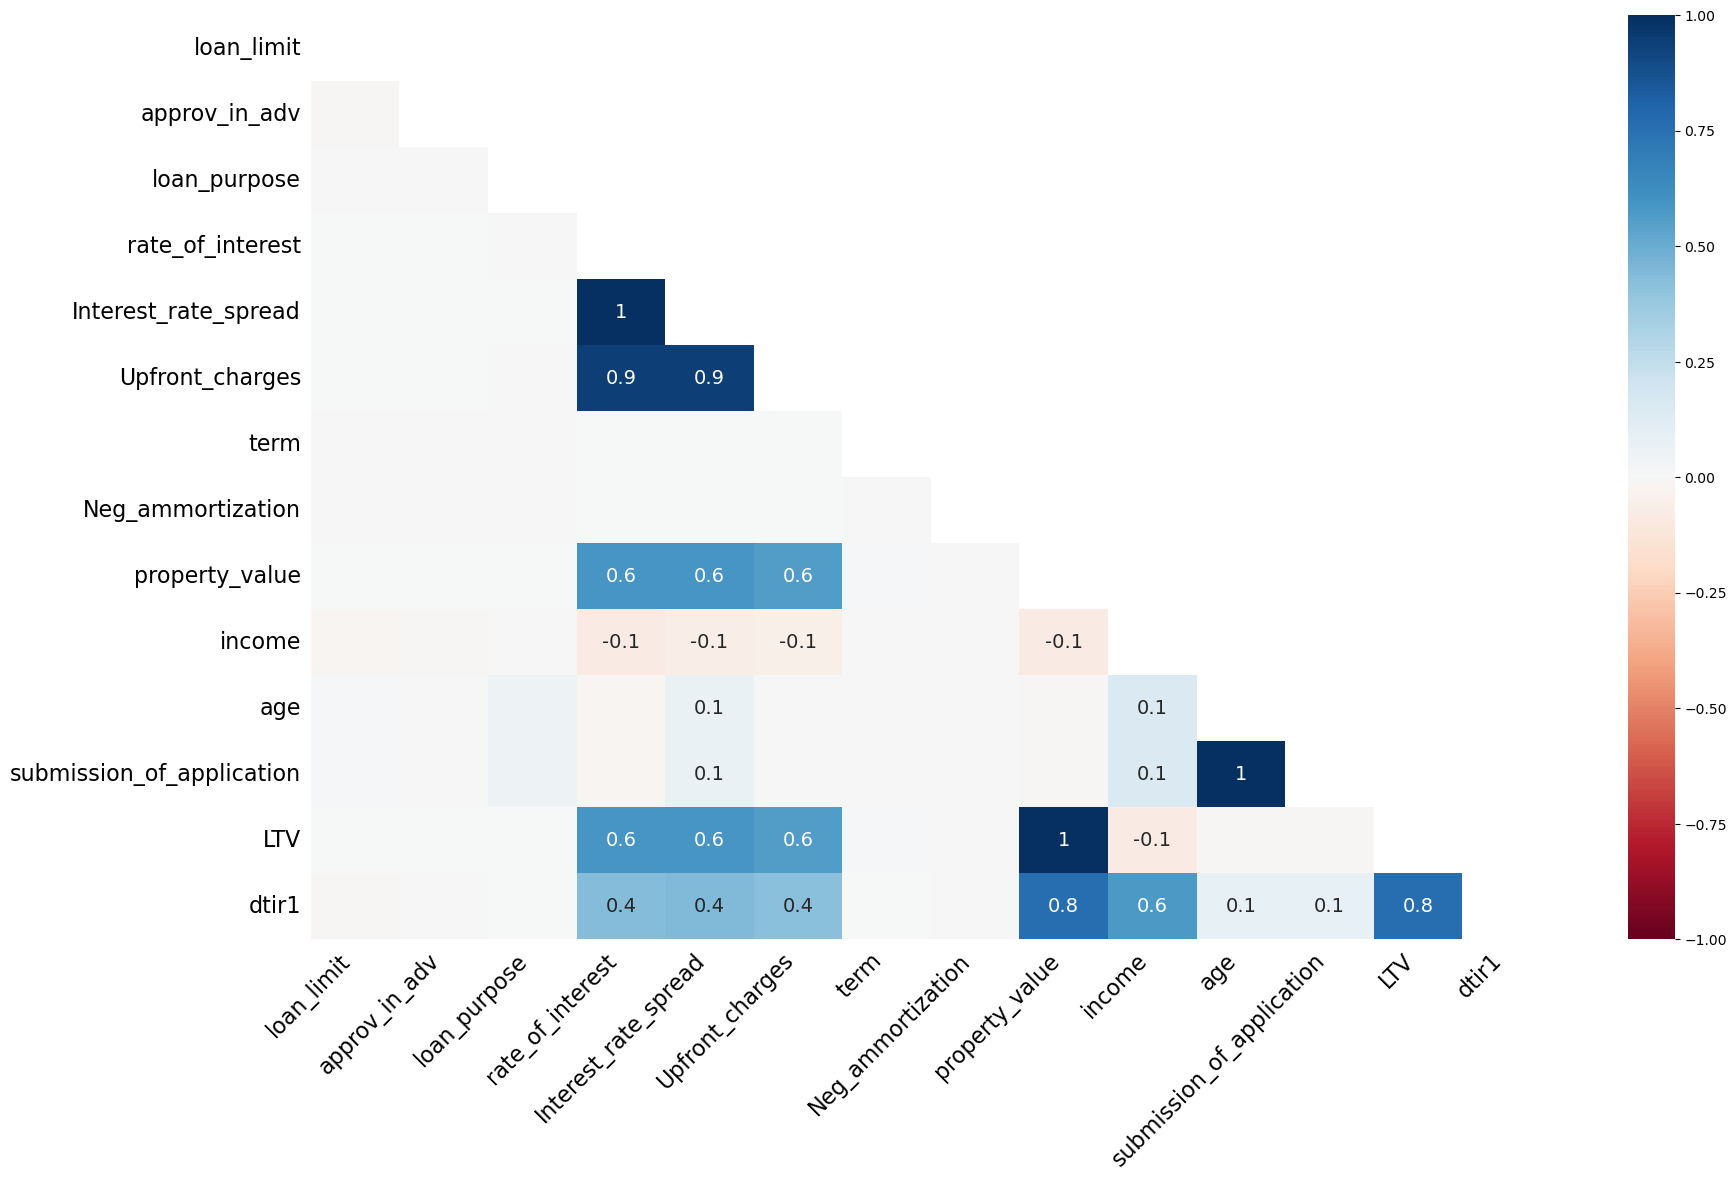

In [7]:
# Create a Correlation Heatmap 
msno.heatmap(loan_data)

From the visualization above, we see that the nullity of some columns are highly correlated with one another. In particular, if the correlation value in the heatmap is 1, we can interpret that to mean the nullity of two attributes are dependent on each other. This is the case for 3 such pairs of attributes:
* `Interest_rate_spread` and `rate_of_interest`
* `LTV` and `property_value`
* `submission_of_application` and `age`

## 2.2 Handling Missing Data
Now that we know the frequency and nullity correlation between missing values in our dataset, there are a few ways we can handle this missing data: **deletion**, **imputation**, and **encoding**. 

### 2.2.1 Deletion
The simplest method is to delete entire columns or rows (i.e. samples) that contain missing data. Looking at the percentages of missing data for columns in the dataset, since the highest percentage of missing data is 26% we will not delete any columns entirely. But what about deleting samples? Since we have determined that there are 14 columns with missing values, perhaps it would be beneficial to delete samples with 7 or more missing values to avoid excessive imputation for any one sample. 

In [8]:
# Display number of samples in original dataset
print(f"Original # of samples: {len(loan_data)}")

# Calculate how many missing values each row contains
missing_values_per_row = loan_data.isnull().sum(axis=1)

# Filter out rows with 7 or more missing values
loan_data_filtered = loan_data[missing_values_per_row < 7].copy()

# Display number of samples in filtered dataset
print(f"Filtered # of samples: {len(loan_data_filtered)}")

Original # of samples: 148670
Filtered # of samples: 148143


Now that we have filtered out the 527 rows with 7 or more missing values, we can now move into **encoding** the missing values for object data-types. 

### 2.2.2 Encoding
For attributes with the object data-type, there are 3 general approaches to encoding missing values. 

> **Method 1: Mode Imputation** - _Replace nulls with the most common category_ 
> 
> Mode imputation is most appropriate when the data is Missing Completely at Random (MCAR) and when the percentage of missing values is small. Additionally, the best case is for situations when the most frequent category significantly outnumbers other categories. 

> **Method 2: New Category** - _Treat nulls as a new category_ 
>
> Designating a new category is best used when the data is Missing Not at Random (MNAR) meaning there is a pattern to the missingness. The new category method is also most appropriate when a significant portion of the values are missing, making mode imputation unreliable.  

> **Method 3: Predictive Modeling** - _Use a separate algorithm to predict the missing category based on other variables_
>
> Predictive modeling is best for when missing values can be reasonably predicted using other features in the dataset. This method is also best suited for situations when the percentage of missing values is neither too small to ignore nor too large to make predicitions unreliable.  

To determine the most appropriate approach to encoding missing values for our dataset, we can begin by investigating each object data-type column and the values already in our dataframe. 

In [9]:
# Identify the object data-type columns containing null values 
object_columns_df = loan_data_filtered.select_dtypes(include=['object'])
object_columns_with_null = object_columns_df.columns[object_columns_df.isnull().any()].tolist()
object_columns_with_null

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [10]:
# Display the distribution of values in each object data-type column
for col in object_columns_with_null:
    print(col)
    print(loan_data_filtered[col].value_counts(dropna=False), end='\n\n')

loan_limit
cf     135208
ncf      9969
NaN      2966
Name: loan_limit, dtype: int64

approv_in_adv
nopre    124203
pre       23129
NaN         811
Name: approv_in_adv, dtype: int64

loan_purpose
p3     55779
p4     54634
p1     34355
p2      3258
NaN      117
Name: loan_purpose, dtype: int64

Neg_ammortization
not_neg    133167
neg_amm     14863
NaN           113
Name: Neg_ammortization, dtype: int64

age
45-54    34621
35-44    32699
55-64    32419
65-74    20671
25-34    19063
>74       7149
<25       1332
NaN        189
Name: age, dtype: int64

submission_of_application
to_inst     95460
not_inst    52494
NaN           189
Name: submission_of_application, dtype: int64



Because all of these object data-type columns contain only a small percentage of missing values, **mode imputation** seems to be the most appropriate method of encoding missing values for these attributes. 

In [11]:
# Perform mode imputation for each object data-type column containing null values
for col in object_columns_with_null:
    mode_value = loan_data_filtered[col].mode()[0]
    loan_data_filtered[col].fillna(mode_value, inplace=True)

# Check if any null values remain in these columns 
remaining_nulls = loan_data_filtered[object_columns_with_null].isnull().sum()
remaining_nulls

loan_limit                   0
approv_in_adv                0
loan_purpose                 0
Neg_ammortization            0
age                          0
submission_of_application    0
dtype: int64

### 2.2.3 Imputation 

Now that we have handled missing values for the object data-type columns, we can fill in the missing numerical values using imputation. Imputation is a method of using other non-null attributes in the dataframe to estimate missing values. In principle, any algorithm can be used to impute the missing data but there are a few factors to consider: _dataset size_, _correlation_, and the _distribution/skew of values_ in the dataset. Let's begin by visualizing these factors. 

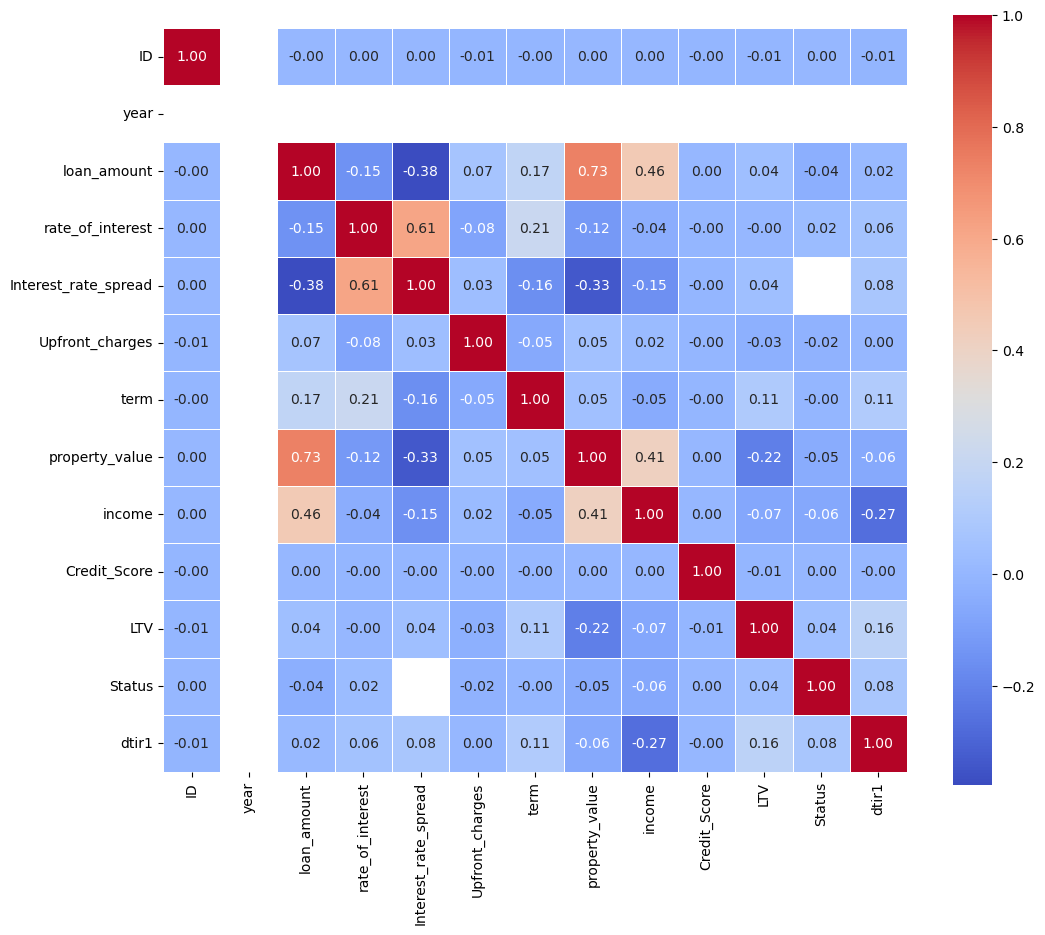

In [12]:
# Calculate the Pearson correlation matrix for numerical columns
pearson_corr = loan_data_filtered.select_dtypes(include=['number']).corr(method='pearson')

# Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

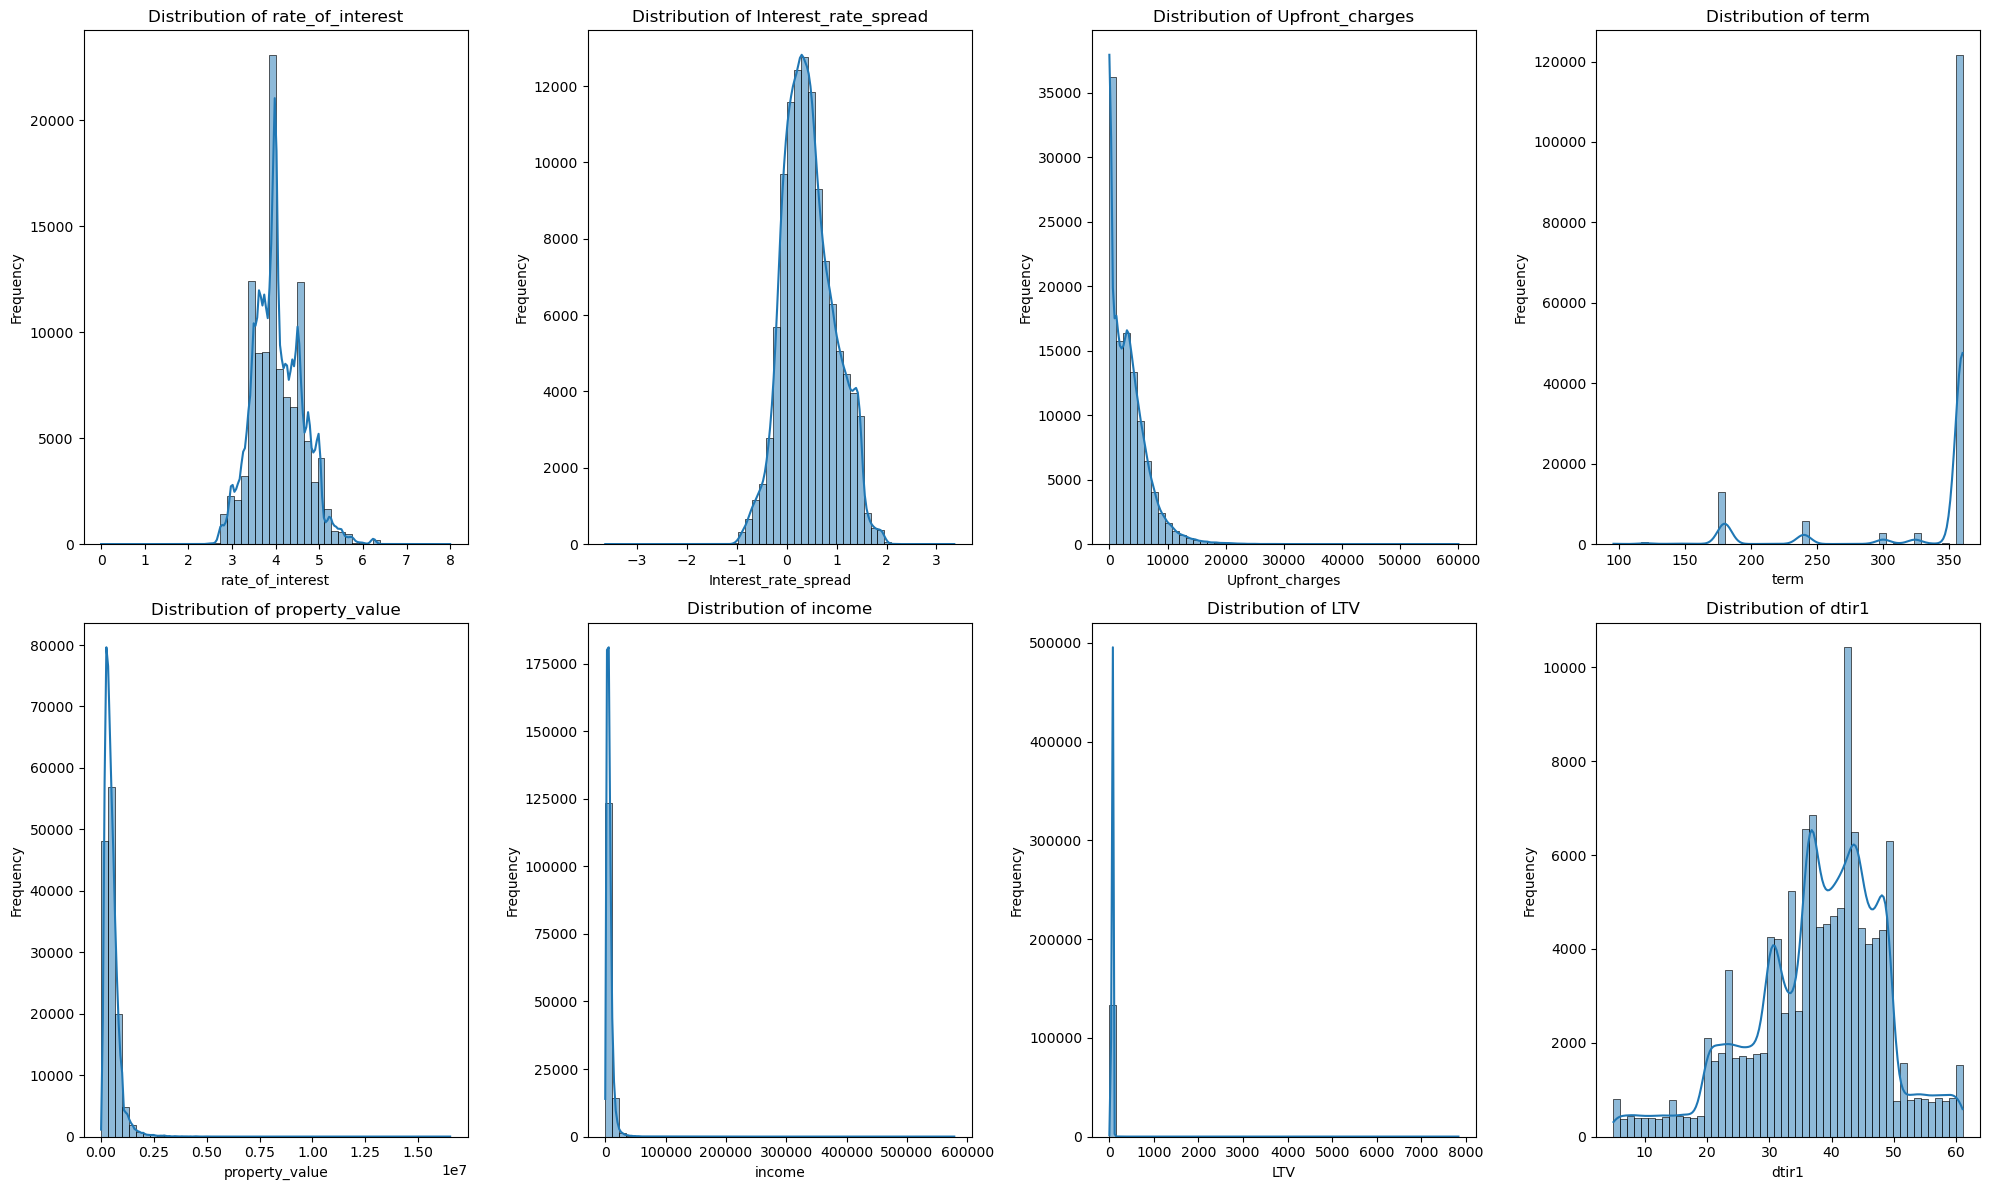

In [13]:
# Identify numerical data-type columns that contain any null values
numerical_columns_df = loan_data_filtered.select_dtypes(include=['number'])
numerical_columns_with_null = numerical_columns_df.columns[numerical_columns_df.isnull().any()].tolist()

# Plot the distribution of values for each numerical column with null values, displayed next to each other
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Flatten the axes array to iterate over it
axes_flat = axes.flatten()

# Remove extra subplots
for i in range(len(numerical_columns_with_null), len(axes_flat)):
    fig.delaxes(axes_flat[i])

# Plot histograms
for col, ax in zip(numerical_columns_with_null, axes_flat):
    sns.histplot(loan_data[col], bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
loan_data_filtered.LTV.describe()

count    133561.000000
mean         72.745879
std          39.969005
min           0.967478
25%          60.474860
50%          75.135870
75%          86.184211
max        7831.250000
Name: LTV, dtype: float64

### Simple Imputation 
Looking at the distributions for `term`, `property_value`, `income`, and `LTV` we see that there is a very strong skew in the distribution. And as each of these attributes contain a relatively small portion of missing values, we can use **simple imputation** to fill in the null values. 

Simple imputation can either take the form of using _mean_, _median_, or _mode_ when deciding what values to use when filling in the missing values. To minimize the effect of outliers in our imputation and seeing as a vast majority of values are contained within a small range, we will use **mode** in our implementation for simple imputation. 

In [15]:
# Identify columns for simple imputation 
simple_impute_cols = ['term', 'property_value', 'income', 'LTV']

# Perform simple imputation using the mode to replace null values 
for col in simple_impute_cols:
    mode_value = loan_data_filtered[col].mode()[0]
    loan_data_filtered[col].fillna(mode_value, inplace=True)

# Check if any null values remain in these columns 
remaining_nulls = loan_data_filtered[simple_impute_cols].isnull().sum()
remaining_nulls

term              0
property_value    0
income            0
LTV               0
dtype: int64

In [16]:
# Verify remaining null values to fill in 
loan_data_filtered.isna().sum()

ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             35923
Interest_rate_spread         36112
Upfront_charges              39115
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                           0
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_applic

For the other 4 attributes `rate_of_interest`, `Interest_rate_spread`, `Upfront_charges`, and `dtir1` we will be using **K-Nearest Neighbors (KNN) Imputation** to fill in the missing values. This method of imputation seems the most appropriate as it can capture non-linear relationships between attributes while taking into consideration the correlations we observed in the Pearson correlation matrix above. Additionally, since KNN imputation doesn't assume any underlying data distribution, we will minimize the risk of reinforcing any bias in the data.

### K-Nearest Neighbors (KNN) Imputation
The big idea of KNN Imputation is that missing values can be estimated by looking at similar samples in our dataset. More specifically, the algorithm first finds _k_-samples in the dataset that are the most similar as determined by some distance metric. In this case, since all attributes we are trying to impute contain numerical data, Euclidean distance can be used as this metric.

Once the _k_-samples and distances have been calculated, the missing value can be estimated as the weighted average of the _k_-nearest neighbors. 

In [17]:
# Create copy of dataframe 
imputed_loan_data = loan_data_filtered.copy()

Before we begin implementing KNN imputation, as this method of imputation only works with numerical data, we must first encode our categorical variables as numerical variables using _label encoding_. This will also come in handy later when we begin to explore predictive models using this dataset. 

In [18]:
# Import Label Encoder library 
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_cols = imputed_loan_data.select_dtypes(include=['object']).columns

# Apply label encoder to each categorical column 
for col in categorical_cols:
    imputed_loan_data[col] = label_encoder.fit_transform(imputed_loan_data[col])

# Show the first few rows of the dataset after label encoding
imputed_loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,24891,2019,0,2,0,1,0,0,0,0,...,2,552,1,3,1,81.250000,0,1,1,NaN
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,39.0


Now that all categorical columns have been successfully encoded into numerical values, we can proceed with KNN imputation to fill in the missing values. 

In [19]:
# Import KNN Imputer library 
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
knn = KNNImputer(n_neighbors=3, weights='uniform')

try:
    # Perform KNN imputation on the selected columns
    df = knn.fit_transform(imputed_loan_data)

    # Convert the result back into a DataFrame using the original column names
    imputed_loan_data = pd.DataFrame(df, columns=imputed_loan_data.columns)
    
except Exception as e:
    str("An exception has occurred")

In [20]:
# Validate successful KNN imputation
imputed_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148143 entries, 0 to 148142
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148143 non-null  float64
 1   year                       148143 non-null  float64
 2   loan_limit                 148143 non-null  float64
 3   Gender                     148143 non-null  float64
 4   approv_in_adv              148143 non-null  float64
 5   loan_type                  148143 non-null  float64
 6   loan_purpose               148143 non-null  float64
 7   Credit_Worthiness          148143 non-null  float64
 8   open_credit                148143 non-null  float64
 9   business_or_commercial     148143 non-null  float64
 10  loan_amount                148143 non-null  float64
 11  rate_of_interest           148143 non-null  float64
 12  Interest_rate_spread       148143 non-null  float64
 13  Upfront_charges            14

# 3. Exploring Predictive Models 

Now we can begin to explore a few different types of predictive models and compare their performances. In this explorative data analysis, we will be working with the following models: **logistic regression**, **classification trees**, and **naive bayes**. 

But before training the various models, I will split our dataset into 2 subsets: the _training_ and the _testing_ subsets. 

In [21]:
# Import library to split dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Define the target we are trying to predict 
target = 'Status' # 0 = no default, 1 = default 

# Separate columns for feature (X) and target (y) variables 
X = imputed_loan_data.drop(target, axis=1)
y = imputed_loan_data[target]

# Perform test-train split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Show the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118514, 33), (29629, 33), (118514,), (29629,))

## 3.1. Feature Scaling 
In many cases, different attributes in a dataset contains features with a wide range of values. It is important to remember that some methods of predictive modeling are sensitive to differences in the magnitude of input features. Scaling the features in a dataset are a way to improve the predictive consistency of future models as well as their performance by reducing the time it takes some algorithms to reach convergence. 

In [22]:
# Import Scaler library 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler 
scaler = StandardScaler()

# Apply the scaler to both the training and testing data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
X_train_scaled[:5]

array([[ 1.09714169,  0.        ,  3.723245  , -0.57563119,  2.32437115,
         2.55728344,  0.10185725, -0.21094621, -0.06027418,  0.4034173 ,
         0.24597836, -1.67929074, -1.07354517,  0.25091679,  0.42494978,
         0.3340298 ,  0.22428153,  0.15219414, -0.49127235,  0.01393225,
         0.10774644, -0.01393225, -0.10839624, -0.08090187,  0.55910959,
        -0.3272655 ,  1.0052961 , -0.15631505,  0.74188837,  0.18288889,
        -0.97656629,  0.01393225,  1.62356217],
       [-0.46796527,  0.        , -0.26858292, -0.57563119, -0.43022389,
         2.55728344,  0.10185725, -0.21094621, -0.06027418,  0.4034173 ,
        -1.0571343 , -0.090847  ,  1.6511712 , -0.08128072, -2.66310584,
         0.3340298 ,  0.22428153,  0.15219414, -0.86457289,  0.01393225,
         0.10774644, -0.01393225, -0.10839624, -0.51085461, -0.27758861,
        -1.03512303,  1.0052961 ,  2.47898803,  0.74188837,  0.07296315,
        -0.97656629,  0.01393225, -0.10796041],
       [-0.53299264,  0.    

## 3.2. Preparing a Dataframe for Metrics for Model Analysis
To easily compare the performance of our various models later, we can create a dataframe to store the following 3 metrics: 
> **Accuracy** - the proportion of correct predictions from the total _(i.e. how often the model correctly identifies defaulters and non-defaulters)_
>
> **Precision** - the proportion of positive predictions that are correct _(i.e. how often the model is correct when it predicts a loan default)_
>
> **Recall** - the proportion of positive observed values that are correctly predicted _(i.e. the proportion of defaulters that the model could correctly predict)_

In this application of model analysis, _recall_ is an important metric as, in the context of loan defaults, it is better for the model to incorrectly predict a non-defaulter as a defaulter than to incorrectly predict a defaulter as a non-defaulter. In other words, when examining the performance of our models, we want to minimize the proportion of false negatives in our model predicitions. 

In [23]:
# Initialize dataframe with metrics for evaluation
metrics = pd.DataFrame(index = ['accuracy', 'precision', 'recall'],
                      columns = ['LogReg', 'ClassTree', 'NaiveBayes'])

## 3.3. Logistic Regression Model

In [24]:
# Import Logistic Regression library and Metrics library for model analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the logistic regression model 
logreg = LogisticRegression(random_state=0)

# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing data
logreg_y_predictions = logreg.predict(X_test_scaled)

# Calculate the metrics of the logistic regression model
metrics.loc['accuracy', 'LogReg'] = accuracy_score(y_test, logreg_y_predictions)
metrics.loc['precision', 'LogReg'] = precision_score(y_test, logreg_y_predictions, average='binary')
metrics.loc['recall', 'LogReg'] = recall_score(y_test, logreg_y_predictions, average='binary')

# Show calculated metrics
metrics

,LogReg,ClassTree,NaiveBayes
accuracy,0.794526,NaN,NaN
precision,0.726865,NaN,NaN
recall,0.247604,NaN,NaN


## 3.4. Classification Tree Model 

In [25]:
# Import Classification Tree library
from sklearn.tree import DecisionTreeClassifier

# Initialize the classification tree model 
classtree = DecisionTreeClassifier(random_state=0)

# Fit the model on the scaled training data
classtree.fit(X_train_scaled, y_train)

# Make predictions on the testing data
classtree_y_predictions = classtree.predict(X_test_scaled)

# Calculate the metrics of the classification tree model
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_test, classtree_y_predictions)
metrics.loc['precision', 'ClassTree'] = precision_score(y_test, classtree_y_predictions, average='binary')
metrics.loc['recall', 'ClassTree'] = recall_score(y_test, classtree_y_predictions, average='binary')

# Show calculated metrics
metrics

,LogReg,ClassTree,NaiveBayes
accuracy,0.794526,0.937764,NaN
precision,0.726865,0.866466,NaN
recall,0.247604,0.879461,NaN


## 3.5. Naive Bayes Model
In this implementation, we will explore the use of the **Gaussian Naive Bayes** model which is often used for classification applications. 

In [26]:
# Import the Gaussian Naive Bayes (GNB) library
from sklearn.naive_bayes import GaussianNB

# Initialize the GNB Classifier 
nb = GaussianNB()

# Fit the model on the scaled training data
nb.fit(X_train_scaled, y_train)

# Make predictions on the testing data
nb_y_predictions = classtree.predict(X_test_scaled)

# Calculate the metrics of the GNB model
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_test, nb_y_predictions)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_test, nb_y_predictions, average='binary')
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_test, nb_y_predictions, average='binary')

# Show calculated metrics
metrics

,LogReg,ClassTree,NaiveBayes
accuracy,0.794526,0.937764,0.937764
precision,0.726865,0.866466,0.866466
recall,0.247604,0.879461,0.879461


# 4. Takeaways
Interestingly, this implementation of decision tree classifiers and the gaussian naive bayes model both performed far better than the simple logistic regression model. In fact, these two models achieved identical scores across all of our metric of analyzing model performance. But why could this be the case? 

Perhaps there could be some fine tuning in the data preprocessing that could be done to improve either models' performance. Maybe tweaking the methods of imputing missing data could help reduce biases introduced in the imputation process that led to such a similar performance. 

Changing the feature selection that either model is trained on could also be impacting the final performance. With 34 columns in our dataset that we are using to train our models, removing some columns can reduce the noise in our data leading to possibly more consistent and accurate predictions. 

Creating predictive models is an iterative process and more tinkering is needed to keep improving our models. 